<a href="https://colab.research.google.com/github/IrynaBarnych/AI11_lab/blob/lab/module4/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [2]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

tensor = torch.tensor([1, 2, 3])
print(tensor.device)

True
1
Tesla T4
cpu


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tensor = torch.tensor([1, 2, 3])
tensor = tensor.to(device)

tensor

tensor([1, 2, 3], device='cuda:0')

In [25]:
device

device(type='cuda')

In [26]:
tensor = torch.tensor([1, 2, 3], device=device)
tensor

tensor([1, 2, 3], device='cuda:0')

# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [27]:
import torch

tensor = torch.randn(2, 3)

print("Розмір тензора:", tensor.size())
print("Тип даних тензора:", tensor.dtype)
print("Пристрій, на якому знаходиться тензор:", tensor.device)
print("Наявність градієнта для тензора:", tensor.requires_grad)

Розмір тензора: torch.Size([2, 3])
Тип даних тензора: torch.float32
Пристрій, на якому знаходиться тензор: cuda:0
Наявність градієнта для тензора: False


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [28]:
tensor1 = torch.randn(100)
tensor2 = torch.randn(100)

mae = torch.mean(torch.abs(tensor1 - tensor2))

print("Середня абсолютна похибка (MAE):", mae.item())

Середня абсолютна похибка (MAE): 1.1322582960128784


# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 128х28х28

In [29]:
tensor1 = torch.randn(32, 28, 28)
tensor2 = torch.randn(16, 28, 28)
tensor3 = torch.randn(64, 28, 28)

result = torch.cat((tensor1, tensor2, tensor3), dim=0)

print("Розмір результату:", result.size())

Розмір результату: torch.Size([112, 28, 28])


# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [30]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

In [31]:
# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-3

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'loss={loss.item()}')

    with torch.no_grad():
      x -= learning_rate * x.grad

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None


loss=1.3333334922790527
loss=-0.012307047843933105
loss=-0.26274728775024414
loss=-0.2934073805809021
loss=-0.29722774028778076
loss=-0.29771918058395386
loss=-0.2977832555770874
loss=-0.29779165983200073
loss=-0.29779279232025146
loss=-0.297792911529541
loss=-0.297792911529541
loss=-0.29779303073883057
loss=-0.29779285192489624
loss=-0.29779285192489624
loss=-0.29779285192489624
loss=-0.29779285192489624
loss=-0.29779285192489624
loss=-0.29779285192489624
loss=-0.29779285192489624
loss=-0.29779285192489624


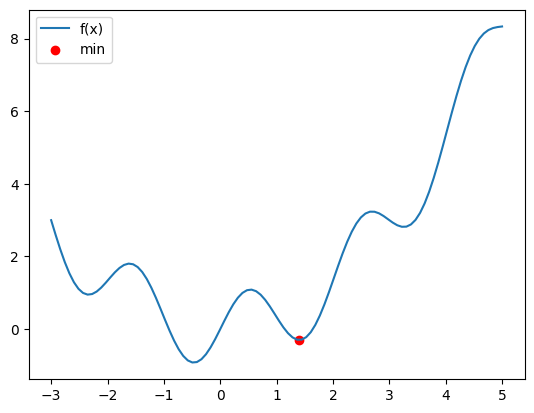

In [32]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()


# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [34]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) +\
  (x-y)**2

In [36]:
# підкоючаємо процесор
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

# швидкість навчання
learning_rate = 1e-3

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)
    loss = f(y)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'loss={loss.item()}')

    with torch.no_grad():
      x -= learning_rate * x.grad
      y -= learning_rate * y.grad

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None
      y.grad = None

loss=1.3333334922790527


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'